In [1]:
import torch
import torch.nn as nn
from nltk.tokenize import sent_tokenize, word_tokenize 
import matplotlib.pyplot as plt

In [2]:
class  skipgram(nn.Module):
    def __init__(self):
        super(skipgram,self).__init__()
        self.model  = nn.Sequential(
            nn.Linear(8,64),
            nn.Linear(64,8),
#            nn.Softmax()
        )
    def forward(self,x):
        return self.model(x)
        
model = skipgram()        

In [3]:
s = "the quick brown fox jumps over the lazy dog "

In [4]:
words = s.split()
# ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

vocab = list(set(words))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(vocab)

skip_gram_pairs = []

for i, center_word in enumerate(words):
    for j in range(i - 2, i + 3):  # window size = 2
        if j != i and 0 <= j < len(words):
            context_word = words[j]
            skip_gram_pairs.append((center_word, context_word))


In [5]:
skip_gram_pairs

[('the', 'quick'),
 ('the', 'brown'),
 ('quick', 'the'),
 ('quick', 'brown'),
 ('quick', 'fox'),
 ('brown', 'the'),
 ('brown', 'quick'),
 ('brown', 'fox'),
 ('brown', 'jumps'),
 ('fox', 'quick'),
 ('fox', 'brown'),
 ('fox', 'jumps'),
 ('fox', 'over'),
 ('jumps', 'brown'),
 ('jumps', 'fox'),
 ('jumps', 'over'),
 ('jumps', 'the'),
 ('over', 'fox'),
 ('over', 'jumps'),
 ('over', 'the'),
 ('over', 'lazy'),
 ('the', 'jumps'),
 ('the', 'over'),
 ('the', 'lazy'),
 ('the', 'dog'),
 ('lazy', 'over'),
 ('lazy', 'the'),
 ('lazy', 'dog'),
 ('dog', 'the'),
 ('dog', 'lazy')]

In [6]:
import numpy as np

def one_hot_encode(word, vocab_size, word2idx):
    vec = np.zeros(vocab_size)
    vec[word2idx[word]] = 1
    return vec

X = []
y = []

for center, context in skip_gram_pairs:
    X.append(one_hot_encode(center, vocab_size, word2idx))
    y.append(one_hot_encode(context, vocab_size, word2idx))

X = torch.tensor(np.array(X), dtype = torch.float32)
y = torch.tensor(np.array(y), dtype = torch.float32)


In [7]:
X,X.shape, y, y.shape

(tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0

In [8]:
words

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [9]:
for i, layer in enumerate(model.model):
    if isinstance(layer, nn.Linear):
        print(f"\nLayer {i} - Linear({layer.in_features}, {layer.out_features})")
        print("Weights:\n", layer.weight.T)
        print("Biases:\n", layer.bias)
    else:
        print(f"\nLayer {i} - {layer.__class__.__name__} (No weights)")


Layer 0 - Linear(8, 64)
Weights:
 tensor([[-1.8911e-01,  1.5603e-01,  2.6385e-01, -2.2323e-01,  2.1644e-01,
          4.0115e-02,  1.5049e-01, -1.0299e-01, -3.1298e-01,  3.5111e-01,
          1.1579e-01, -1.3500e-01,  2.0427e-02,  2.2772e-01,  1.5442e-02,
         -9.1608e-02, -7.1134e-02, -1.3802e-02,  1.8273e-01, -1.7457e-01,
          2.7931e-02, -2.5980e-01, -2.2619e-01, -2.8347e-01,  2.4405e-01,
          7.5678e-03, -1.3404e-01, -8.9358e-02, -9.2042e-02, -3.3385e-01,
          2.0175e-01, -2.2311e-01,  3.0611e-01,  2.7855e-01,  1.3423e-01,
          2.3290e-01,  1.3645e-01, -2.8331e-01, -2.9018e-01,  2.1894e-01,
         -2.2857e-01,  3.2720e-01, -7.0041e-02, -1.1320e-01, -3.3887e-01,
          1.5956e-01,  1.0575e-03,  8.9373e-02,  2.1888e-01,  2.9062e-01,
         -2.0381e-01,  3.1729e-01, -3.8273e-02, -1.0193e-01,  1.3220e-01,
         -8.8319e-02,  2.9935e-02,  2.5844e-01, -8.8147e-02,  1.9668e-01,
          8.3522e-02,  1.4644e-01,  2.4924e-01, -1.3410e-01],
        [ 2.563

In [10]:
X

tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0

In [11]:
model(X)

tensor([[ 0.4104, -0.1903, -0.1470,  0.2256,  0.0087, -0.1756, -0.0558,  0.0820],
        [ 0.4104, -0.1903, -0.1470,  0.2256,  0.0087, -0.1756, -0.0558,  0.0820],
        [ 0.0838,  0.0875,  0.0160, -0.0818, -0.1635, -0.1805,  0.1685, -0.0623],
        [ 0.0838,  0.0875,  0.0160, -0.0818, -0.1635, -0.1805,  0.1685, -0.0623],
        [ 0.0838,  0.0875,  0.0160, -0.0818, -0.1635, -0.1805,  0.1685, -0.0623],
        [ 0.2379, -0.2066, -0.0638,  0.1012, -0.1706,  0.0008,  0.0795,  0.1622],
        [ 0.2379, -0.2066, -0.0638,  0.1012, -0.1706,  0.0008,  0.0795,  0.1622],
        [ 0.2379, -0.2066, -0.0638,  0.1012, -0.1706,  0.0008,  0.0795,  0.1622],
        [ 0.2379, -0.2066, -0.0638,  0.1012, -0.1706,  0.0008,  0.0795,  0.1622],
        [ 0.1438, -0.2051,  0.1352,  0.1730, -0.0449, -0.0769, -0.1594,  0.2000],
        [ 0.1438, -0.2051,  0.1352,  0.1730, -0.0449, -0.0769, -0.1594,  0.2000],
        [ 0.1438, -0.2051,  0.1352,  0.1730, -0.0449, -0.0769, -0.1594,  0.2000],
        [ 0.1438

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [13]:
epochs = 1000

for ep in range(epochs):
    pred = model(X)
    loss = loss_fn(pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(ep, loss.item())

0 2.079684257507324
1 2.020949363708496
2 1.9720715284347534
3 1.9295268058776855
4 1.8903706073760986
5 1.852622151374817
6 1.8152904510498047
7 1.7781589031219482
8 1.7414557933807373
9 1.705578088760376
10 1.6709372997283936
11 1.6378997564315796
12 1.6067756414413452
13 1.5778310298919678
14 1.5512694120407104
15 1.5271830558776855
16 1.5055280923843384
17 1.4861763715744019
18 1.4690086841583252
19 1.453942060470581
20 1.44088876247406
21 1.4296852350234985
22 1.420066475868225
23 1.411766529083252
24 1.4046517610549927
25 1.3986936807632446
26 1.3938374519348145
27 1.3899304866790771
28 1.3867324590682983
29 1.3839811086654663
30 1.3815046548843384
31 1.3792766332626343
32 1.377345323562622
33 1.3757416009902954
34 1.37444269657135
35 1.373390793800354
36 1.3725316524505615
37 1.371808648109436
38 1.3711405992507935
39 1.3704733848571777
40 1.369836449623108
41 1.3693093061447144
42 1.3689277172088623
43 1.3686314821243286
44 1.3683403730392456
45 1.3680402040481567
46 1.36775183

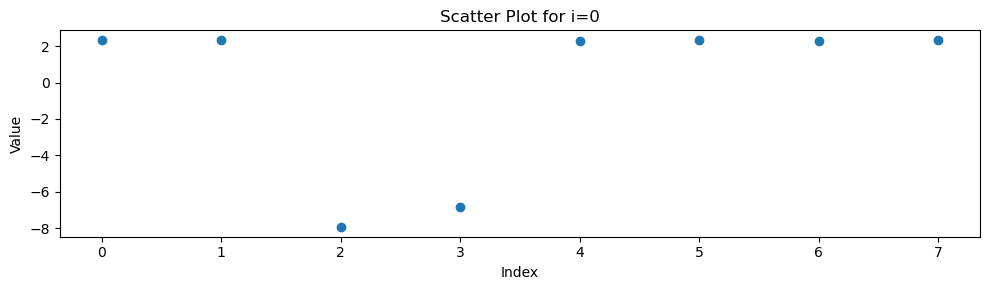

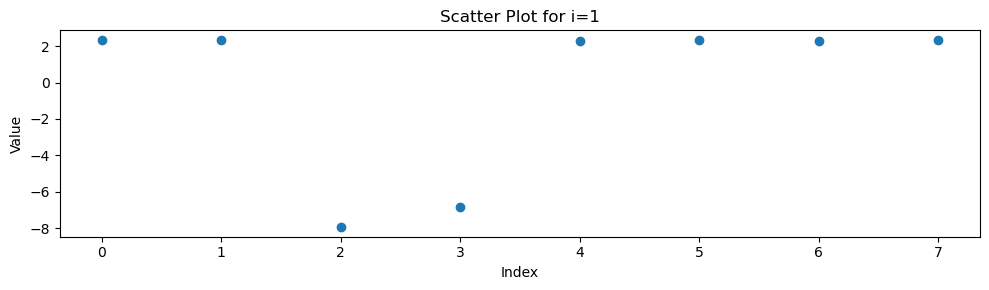

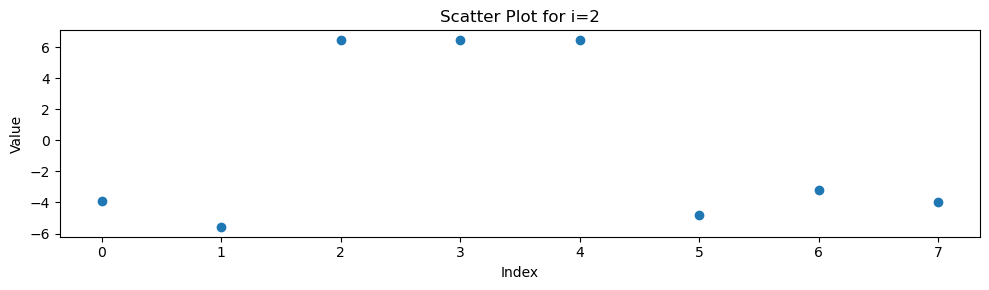

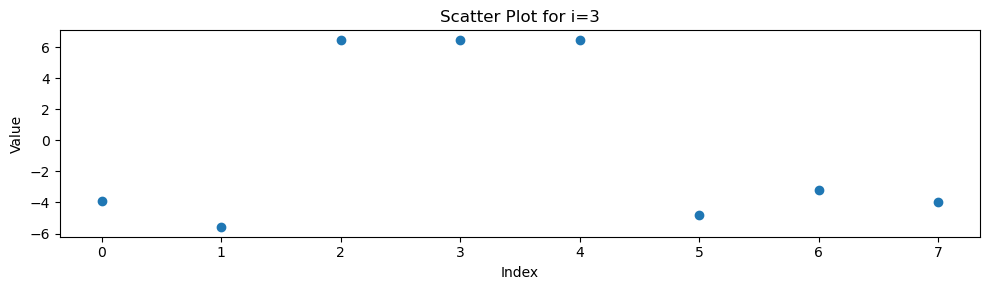

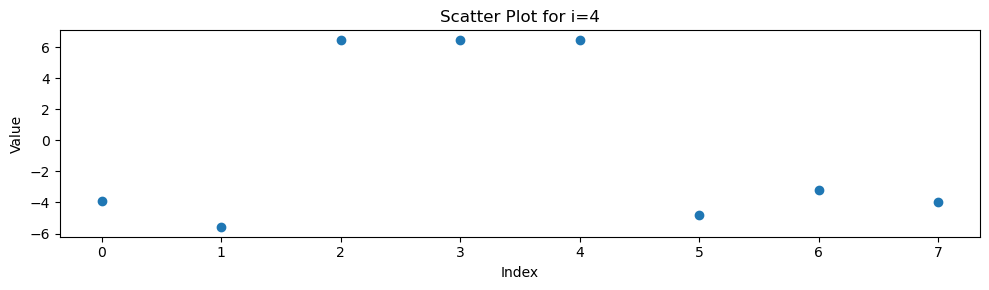

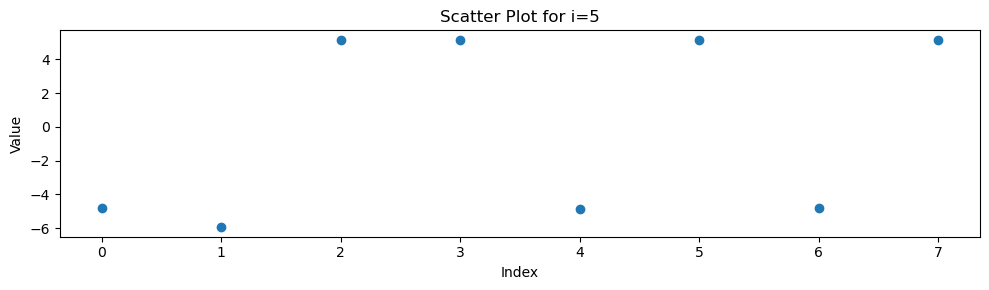

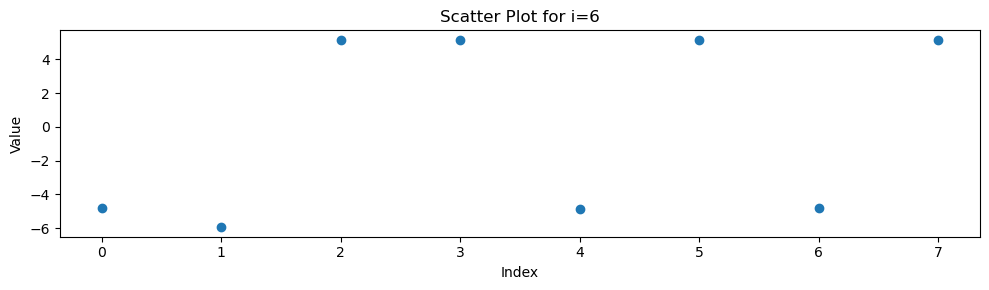

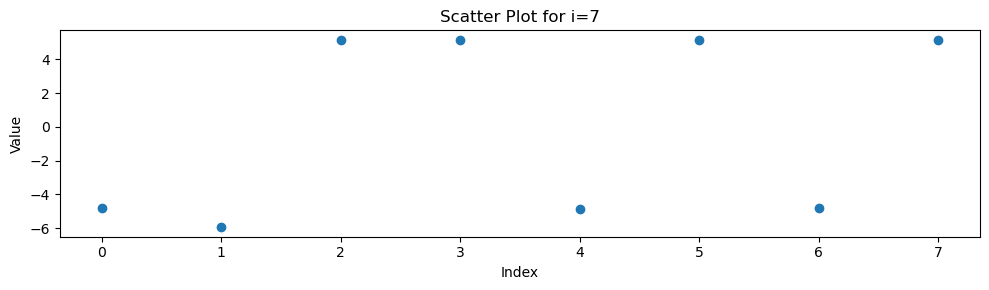

In [14]:
for i in range(8):
    a = []
    for _ in model(X)[i]:
        a.append(_.item())
    
    plt.figure(figsize=(10, 3))  # Smaller figure size
    plt.scatter(range(len(a)), a)
    plt.title(f'Scatter Plot for i={i}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.tight_layout()  # Optional: prevent label cutoff
    plt.show()


In [15]:
words

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [40]:
output = model(X)

In [46]:
output, output.shape

(tensor([[ 2.3226,  2.3049, -7.9429, -6.8218,  2.3027,  2.3352,  2.2968,  2.3464],
         [ 2.3226,  2.3049, -7.9429, -6.8218,  2.3027,  2.3352,  2.2968,  2.3464],
         [-3.9133, -5.6011,  6.4821,  6.4663,  6.4563, -4.8314, -3.1927, -3.9728],
         [-3.9133, -5.6011,  6.4821,  6.4663,  6.4563, -4.8314, -3.1927, -3.9728],
         [-3.9133, -5.6011,  6.4821,  6.4663,  6.4563, -4.8314, -3.1927, -3.9728],
         [-4.7903, -5.9528,  5.1344,  5.1234, -4.8404,  5.1473, -4.8093,  5.1625],
         [-4.7903, -5.9528,  5.1344,  5.1234, -4.8404,  5.1473, -4.8093,  5.1625],
         [-4.7903, -5.9528,  5.1344,  5.1234, -4.8404,  5.1473, -4.8093,  5.1625],
         [-4.7903, -5.9528,  5.1344,  5.1234, -4.8404,  5.1473, -4.8093,  5.1625],
         [-4.8418, -4.6755, -4.7123, -4.9808,  5.2846,  5.3324,  5.2810,  5.3449],
         [-4.8418, -4.6755, -4.7123, -4.9808,  5.2846,  5.3324,  5.2810,  5.3449],
         [-4.8418, -4.6755, -4.7123, -4.9808,  5.2846,  5.3324,  5.2810,  5.3449],
    

In [56]:
torch.dot(output[9],output[-1])

tensor(-134.5114, grad_fn=<DotBackward0>)

In [62]:
max_val = float('-inf')
max_i = -1
max_j = -1

for i in range(30):
    for j in range(30):
        if i != j:
            dot = torch.dot(output[i], output[j])
            if dot > max_val:
                max_val = dot.item()
                max_i = i
                max_j = j

print(f"Max dot product: {max_val} at (i={max_i}, j={max_j})")


Max dot product: 221.5185546875 at (i=2, j=3)


In [64]:
unique_output = torch.unique(output, dim=0)
print(unique_output.shape)
print(unique_output)


torch.Size([8, 8])
tensor([[-5.1319, -5.1606,  5.1259,  5.1078,  5.0949, -5.2223,  5.0917, -5.5057],
        [-4.8418, -4.6755, -4.7123, -4.9808,  5.2846,  5.3324,  5.2810,  5.3449],
        [-4.7903, -5.9528,  5.1344,  5.1234, -4.8404,  5.1473, -4.8093,  5.1625],
        [-3.9133, -5.6011,  6.4821,  6.4663,  6.4563, -4.8314, -3.1927, -3.9728],
        [-3.6101,  6.3778, -4.2639,  6.3789, -3.7866, -3.8067,  6.3678, -4.9798],
        [ 2.3226,  2.3049, -7.9429, -6.8218,  2.3027,  2.3352,  2.2968,  2.3464],
        [ 4.8101, -6.1332,  4.8060,  4.7944, -5.0692, -4.8900, -6.0569,  4.8313],
        [ 7.5201, -3.1383, -2.5393,  7.5052, -3.9715, -5.8015, -3.6881, -2.9855]],
       grad_fn=<UniqueDimBackward0>)


In [68]:
max_val = float('-inf')
max_i = -1
max_j = -1

for i in range(8):
    for j in range(8):
        if i != j:
            dot = torch.dot(unique_output[i], unique_output[j])
            if dot > max_val:
                max_val = dot.item()
                max_i = i
                max_j = j

print(f"Max dot product: {max_val} at (i={max_i}, j={max_j})")


Max dot product: 178.9842987060547 at (i=0, j=3)
